# Model - Logistics Regression

Let us build some intuition around the Loan Data

In [1]:
#Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Default Variables
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,9)
plt.rcParams['font.size'] = 18
plt.style.use('fivethirtyeight')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [24]:
#Load the dataset
df = pd.read_csv("../data/loan_data_clean.csv")

In [25]:
df.head()

,default,amount,interest,grade,years,ownership,income,age
0,0,5000,10.65,B,10.00,RENT,24000.00,33
1,0,2400,10.99,C,25.00,RENT,12252.00,31
2,0,10000,13.49,C,13.00,RENT,49200.00,24
3,0,5000,10.99,A,3.00,RENT,36000.00,39
4,0,3000,10.99,E,9.00,RENT,48000.00,24


##  Logistic Regression - Two Variable `age` and `interest`

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
# Define the features
X = df.loc[:,('age', 'years')]

In [8]:
# Define the target
y = df['default']

In [9]:
# Initiate the model
clf_logistic_2 = LogisticRegression()

In [10]:
#Fit the model
clf_logistic_2.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
# Calculate the Accuracy Score
clf_logistic_2.score(X,y)

0.88907222164930733

In [12]:
# Calculate the predictions
y_pred = clf_logistic_2.predict(X)

In [13]:
# Calculate the probabilities
y_proba = clf_logistic_2.predict_proba(X)[:,0]

### Plot the Decision Boundaries

In [14]:
x1_min, x1_max = X.iloc[:,0].min(), X.iloc[:,0].max()
x2_min, x2_max = X.iloc[:,1].min(), X.iloc[:,1].max()
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, (x1_max - x1_min)/100), 
                       np.arange(x2_min, x2_max, (x2_max - x2_min)/100))
xx = np.c_[np.ones(xx1.ravel().shape[0]), xx1.ravel(), xx2.ravel()]

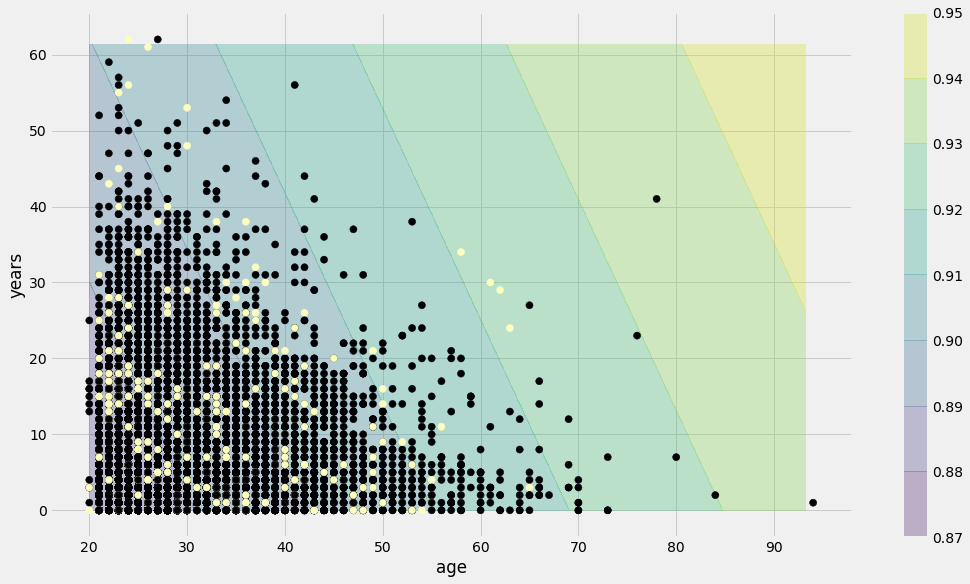

In [15]:
Z = clf_logistic_2.predict_proba(np.c_[xx1.ravel(), xx2.ravel()])[:,0]
Z = Z.reshape(xx1.shape)
cs = plt.contourf(xx1, xx2, Z, cmap=plt.cm.viridis, alpha = 0.3)
plt.scatter(x = X.iloc[:,0], y = X.iloc[:,1], c = y, s = 50, cmap=plt.cm.magma)
plt.colorbar(cs)
plt.xlabel('age')
plt.ylabel('years')

Exercise: What is the range of the predicted probabilities

Exercise: What is the accuracy measure if you change the cut-off threshold

## Logistic Regression - All Variables

In [64]:
# Preprocess the data

In [41]:
df = pd.read_csv("../data/loan_data_clean.csv")

In [42]:
df.head()

,default,amount,interest,grade,years,ownership,income,age
0,0,5000,10.65,B,10.00,RENT,24000.00,33
1,0,2400,10.99,C,25.00,RENT,12252.00,31
2,0,10000,13.49,C,13.00,RENT,49200.00,24
3,0,5000,10.99,A,3.00,RENT,36000.00,39
4,0,3000,10.99,E,9.00,RENT,48000.00,24


In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
le = LabelEncoder()

In [45]:
df.grade = le.fit_transform(df.grade)

In [46]:
le.classes_

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [47]:
df.head()

,default,amount,interest,grade,years,ownership,income,age
0,0,5000,10.65,1,10.00,RENT,24000.00,33
1,0,2400,10.99,2,25.00,RENT,12252.00,31
2,0,10000,13.49,2,13.00,RENT,49200.00,24
3,0,5000,10.99,0,3.00,RENT,36000.00,39
4,0,3000,10.99,4,9.00,RENT,48000.00,24


In [48]:
df.ownership = le.fit_transform(df.ownership)

In [50]:
?le

In [49]:
le.classes_

array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object)

In [51]:
df.head()

,default,amount,interest,grade,years,ownership,income,age
0,0,5000,10.65,1,10.00,3,24000.00,33
1,0,2400,10.99,2,25.00,3,12252.00,31
2,0,10000,13.49,2,13.00,3,49200.00,24
3,0,5000,10.99,0,3.00,3,36000.00,39
4,0,3000,10.99,4,9.00,3,48000.00,24


In [65]:
# Build the Model

In [65]:
df['amount_log'] = np.log10(df.amount)

In [66]:
df['income_log'] = np.log10(df.income)

In [78]:
df['age_log'] = np.log10(df.age)

In [83]:
df['years_log'] = np.log10(df.years + 1)

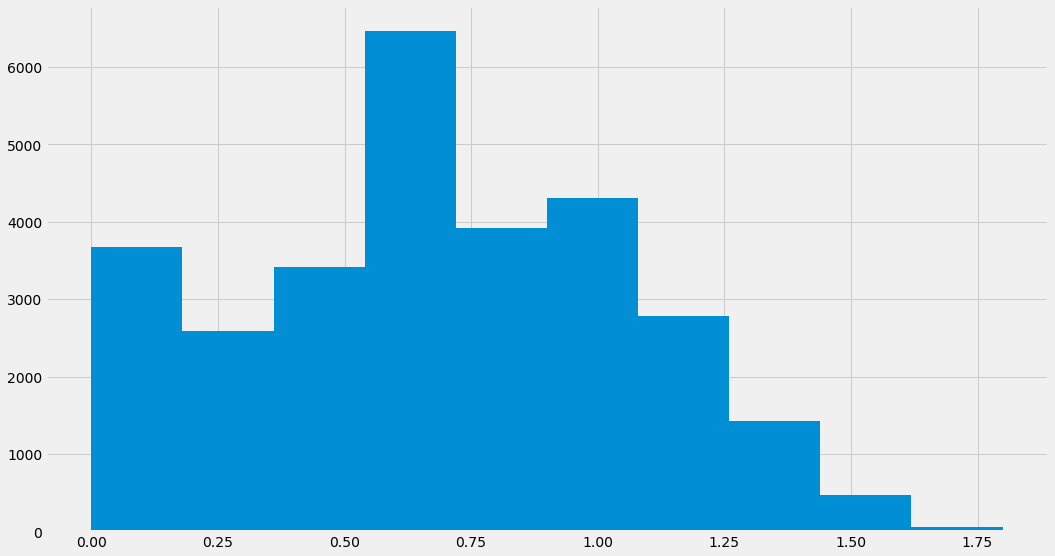

In [84]:
df.years_log.hist()

In [85]:
df.head()

,default,amount,interest,grade,years,ownership,income,age,amount_log,income_log,age_log,years_log
0,0,5000,10.65,1,10.00,3,24000.00,33,3.70,4.38,1.52,1.04
1,0,2400,10.99,2,25.00,3,12252.00,31,3.38,4.09,1.49,1.41
2,0,10000,13.49,2,13.00,3,49200.00,24,4.00,4.69,1.38,1.15
3,0,5000,10.99,0,3.00,3,36000.00,39,3.70,4.56,1.59,0.60
4,0,3000,10.99,4,9.00,3,48000.00,24,3.48,4.68,1.38,1.00


In [87]:
X = df[['amount_log', 'interest', 'grade', 'years_log', 'ownership', 'income_log', 'age_log' ]]

In [88]:
y = df.default

In [95]:
from sklearn.linear_model import LogisticRegressionCV

In [138]:
clf = LogisticRegressionCV(Cs = [0.001, 0.01, 0.1, 1, 10], class_weight="balanced", penalty='l1', 
                           verbose =1, cv=5, solver="liblinear" )

In [139]:
#from sklearn.feature_selection import SelectFromModel

In [140]:
#model = SelectFromModel(clf)

In [141]:
clf.fit(X,y)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/Users/amitkaps/miniconda3/lib/python3.5/site-packages/sklearn/svm/base.py:920: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.1min finished


LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1, 10], class_weight='balanced',
           cv=5, dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=1, penalty='l1',
           random_state=None, refit=True, scoring=None, solver='liblinear',
           tol=0.0001, verbose=1)

In [142]:
clf.C_

array([ 0.01])

In [143]:
clf.coef_

array([[ 0.        ,  0.11738942,  0.12191393,  0.        ,  0.02370817,
        -0.33358068,  0.        ]])

In [186]:
y_pred = clf.predict(X)

In [187]:
y_pred

array([0, 1, 1, ..., 0, 0, 1])

In [145]:
X.head()

,amount_log,interest,grade,years_log,ownership,income_log,age_log
0,3.70,10.65,1,1.04,3,4.38,1.52
1,3.38,10.99,2,1.41,3,4.09,1.49
2,4.00,13.49,2,1.15,3,4.69,1.38
3,3.70,10.99,0,0.60,3,4.56,1.59
4,3.48,10.99,4,1.00,3,4.68,1.38


In [147]:
clf.predict_proba(X)

array([[ 0.5044794 ,  0.4955206 ],
       [ 0.43996226,  0.56003774],
       [ 0.41741681,  0.58258319],
       ..., 
       [ 0.6727327 ,  0.3272673 ],
       [ 0.71015106,  0.28984894],
       [ 0.40693912,  0.59306088]])

In [165]:
def P(z):
    return 1/(1+np.exp(-z))

In [175]:
z=0.12*df.interest + 0.12 * df.grade - 0.33 * df.income_log
#z=0.12*df.interest + 0.12 * df.grade + 0.02 * df.ownership - 0.33 * df.income_log

In [188]:
y_pred_easy = P(z)

In [190]:
y_pred_easy.tail()

29086   0.33
29087   0.52
29088   0.34
29089   0.30
29090   0.59
dtype: float64

In [2]:
# Calculate the accuracy

In [191]:
from sklearn import metrics

In [192]:
metrics.roc_auc_score(y_pred, y)

0.54408377024882304

In [193]:
metricas.accuracy_score(y_pred,y)

0.62826991165652613

In [194]:
metrics.confusion_matrix(y_pred=y_pred, y_true=y)

array([[16412,  9452],
       [ 1362,  1865]])

In [195]:
y.value_counts()

0    25864
1     3227
Name: default, dtype: int64

## Calculate the  error metric
- Accuracy
- Precision
- Recall
- Sensitivity
- Specificity
- Receiver Operating Curve
- Area Under the Curve

## Choosing the Error Metric
What is a good error metric to choose in this case?

## Regularization - L1 and L2

## Feature Selection